In [1]:
# Load required libraries
library("ggplot2")
library("readr")
library("dplyr")

# Read dataset
NY_House_Dataset <- read_csv("NY-House-Dataset.csv")

# Make a copy for processing
dataset <- NY_House_Dataset

summary(dataset)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Rows: 4801 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): BROKERTITLE, TYPE, ADDRESS, STATE, MAIN_ADDRESS, ADMINISTRATIVE_AR...
dbl  (6): PRICE, BEDS, BATH, PROPERTYSQFT, LATITUDE, LONGITUDE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 BROKERTITLE            TYPE               PRICE                BEDS       
 Length:4801        Length:4801        Min.   :2.494e+03   Min.   : 1.000  
 Class :character   Class :character   1st Qu.:4.990e+05   1st Qu.: 2.000  
 Mode  :character   Mode  :character   Median :8.250e+05   Median : 3.000  
                                       Mean   :2.357e+06   Mean   : 3.357  
                                       3rd Qu.:1.495e+06   3rd Qu.: 4.000  
                                       Max.   :2.147e+09   Max.   :50.000  
      BATH         PROPERTYSQFT     ADDRESS             STATE          
 Min.   : 0.000   Min.   :  230   Length:4801        Length:4801       
 1st Qu.: 1.000   1st Qu.: 1200   Class :character   Class :character  
 Median : 2.000   Median : 2184   Mode  :character   Mode  :character  
 Mean   : 2.374   Mean   : 2184                                        
 3rd Qu.: 3.000   3rd Qu.: 2184                                        
 Max.   :50.000   Max.   :65535     

[1] "BROKERTITLE"                 "TYPE"                       
 [3] "PRICE"                       "BEDS"                       
 [5] "BATH"                        "PROPERTYSQFT"               
 [7] "ADDRESS"                     "STATE"                      
 [9] "MAIN_ADDRESS"                "ADMINISTRATIVE_AREA_LEVEL_2"
[11] "LOCALITY"                    "SUBLOCALITY"                
[13] "STREET_NAME"                 "LONG_NAME"                  
[15] "FORMATTED_ADDRESS"           "LATITUDE"                   
[17] "LONGITUDE"                   "log_PRICE"                  
[19] "log_PROPERTYSQFT"


Call:
lm(formula = log_PRICE ~ log_PROPERTYSQFT, data = dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.96783 -0.19911 -0.05041  0.19131  1.01634 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.42346    0.05386   44.99   <2e-16 ***
log_PROPERTYSQFT  1.11570    0.01673   66.70   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2887 on 3176 degrees of freedom
Multiple R-squared:  0.5835,	Adjusted R-squared:  0.5833 
F-statistic:  4449 on 1 and 3176 DF,  p-value: < 2.2e-16



Call:
lm(formula = log_PRICE ~ log_PROPERTYSQFT + BEDS, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1519 -0.1984 -0.0442  0.1900  0.9948 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.098515   0.063178  33.216   <2e-16 ***
log_PROPERTYSQFT  1.240642   0.021096  58.810   <2e-16 ***
BEDS             -0.021743   0.002288  -9.502   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2848 on 3175 degrees of freedom
Multiple R-squared:  0.595,	Adjusted R-squared:  0.5947 
F-statistic:  2332 on 2 and 3175 DF,  p-value: < 2.2e-16



Call:
lm(formula = log_PRICE ~ log_PROPERTYSQFT + BEDS + BATH, data = dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.60603 -0.19460 -0.03885  0.18549  0.95310 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.280599   0.065604  34.763   <2e-16 ***
log_PROPERTYSQFT  1.174297   0.022104  53.126   <2e-16 ***
BEDS             -0.038502   0.002930 -13.142   <2e-16 ***
BATH              0.035569   0.003957   8.989   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2813 on 3174 degrees of freedom
Multiple R-squared:  0.6051,	Adjusted R-squared:  0.6047 
F-statistic:  1621 on 3 and 3174 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


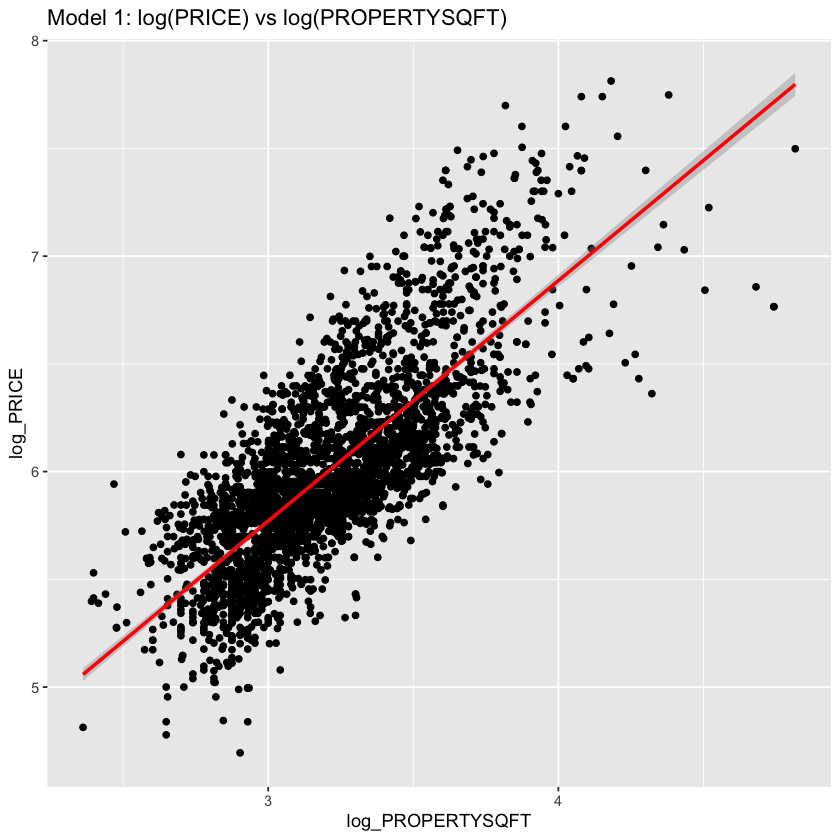

`geom_smooth()` using formula = 'y ~ x'


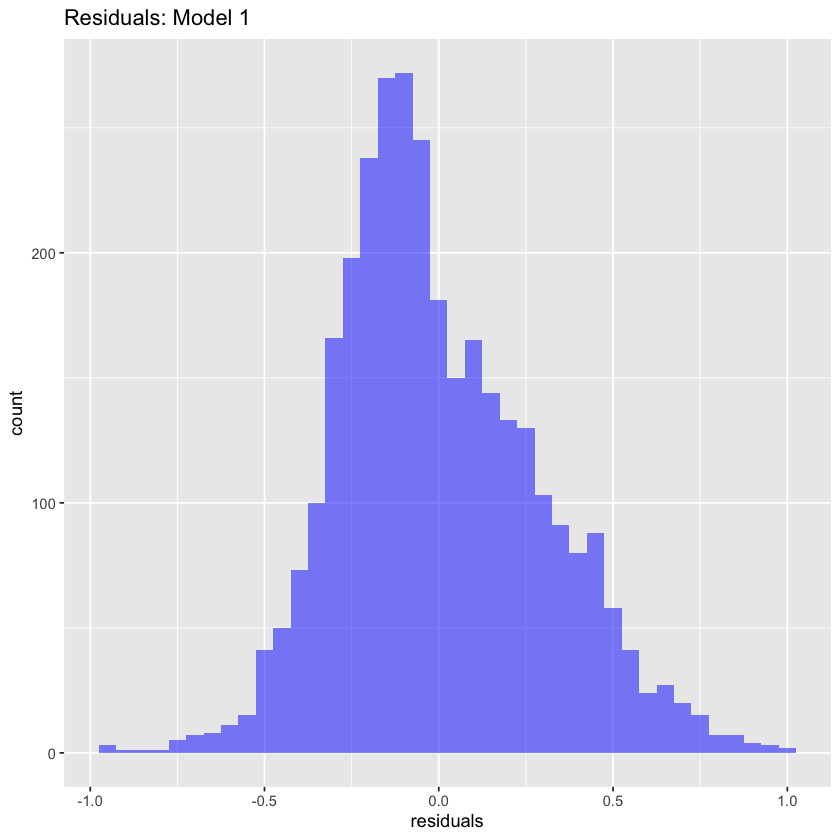

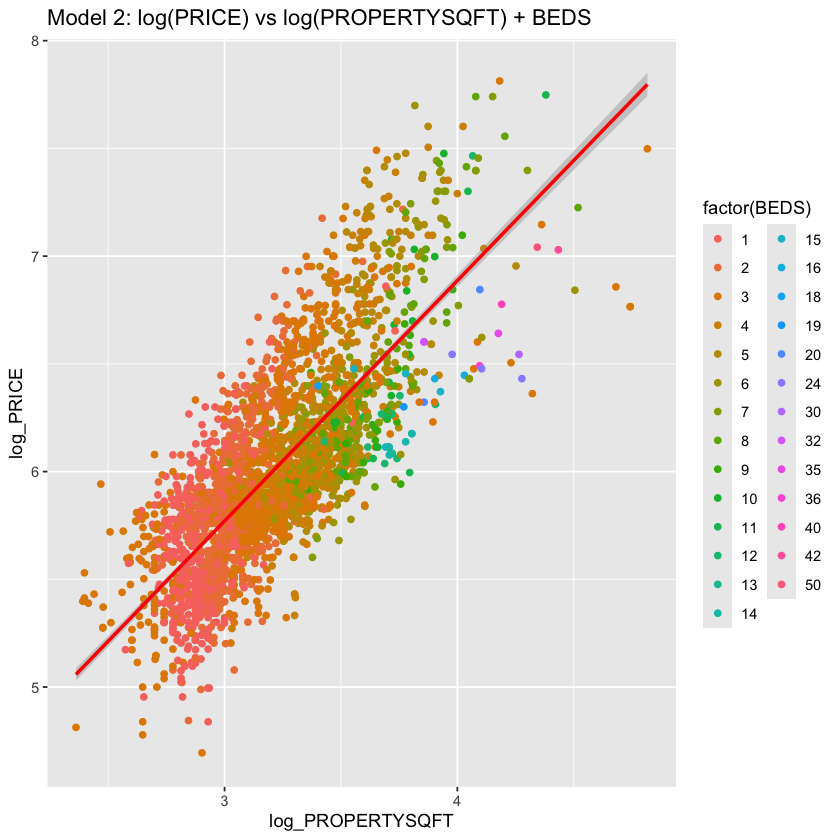

`geom_smooth()` using formula = 'y ~ x'


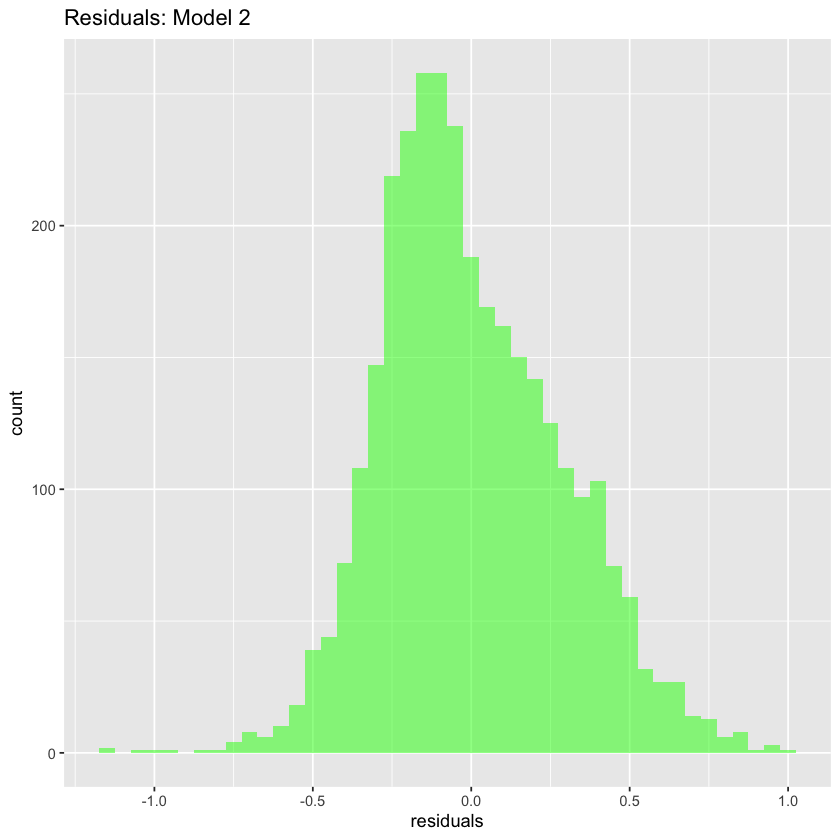

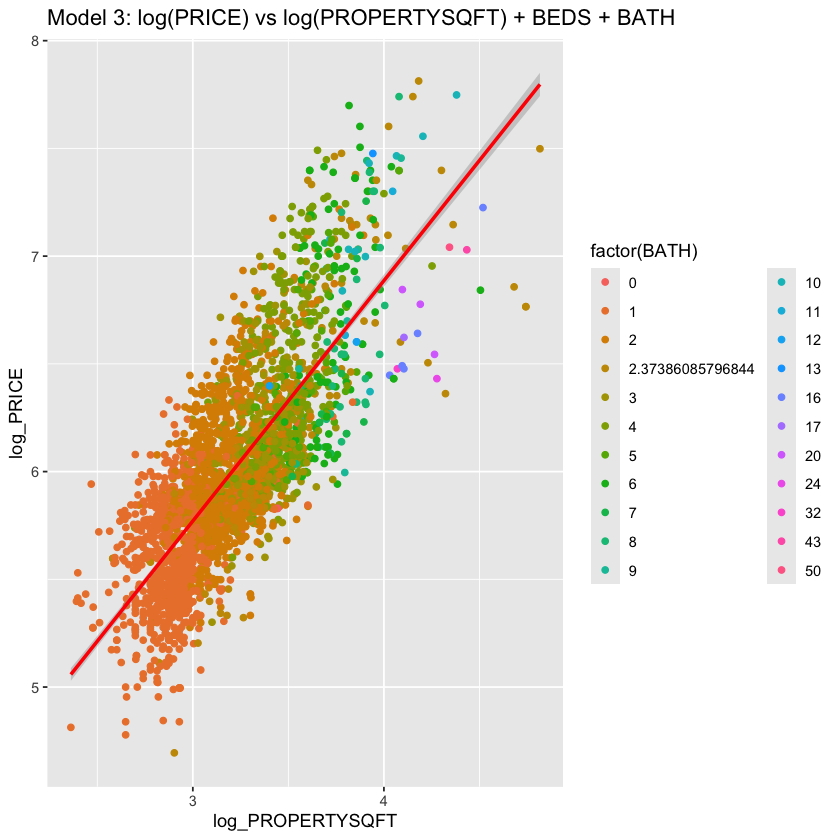


Comparing Models:
Model 1 (R-squared): 0.5834785 
Model 2 (R-squared): 0.5949959 
Model 3 (R-squared): 0.6050514 


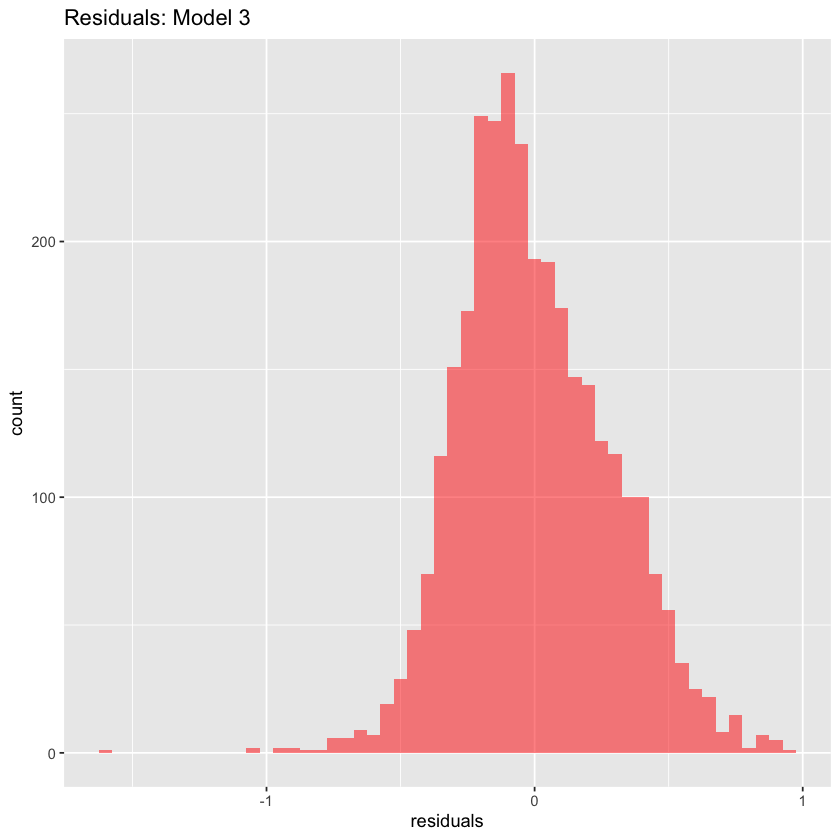

In [2]:
# Data Cleaning: Remove extreme outliers in PRICE
dataset <- dataset %>% filter(PRICE < 195000000)

# Remove specific PROPERTYSQFT outlier
dataset <- dataset %>% filter(PROPERTYSQFT != 2184.207862)

# Apply logarithmic transformation for better linearity
dataset <- dataset %>%
  mutate(log_PRICE = log10(PRICE),
         log_PROPERTYSQFT = log10(PROPERTYSQFT))

# Check column names
names(dataset)

# Fit Model 1: log(PRICE) ~ log(PROPERTYSQFT)
model1 <- lm(log_PRICE ~ log_PROPERTYSQFT, data = dataset)
summary(model1)

# Fit Model 2: log(PRICE) ~ log(PROPERTYSQFT) + BEDS
model2 <- lm(log_PRICE ~ log_PROPERTYSQFT + BEDS, data = dataset)
summary(model2)

# Fit Model 3: log(PRICE) ~ log(PROPERTYSQFT) + BEDS + BATH
model3 <- lm(log_PRICE ~ log_PROPERTYSQFT + BEDS + BATH, data = dataset)
summary(model3)

# Plot significant variable from Model 1
ggplot(dataset, aes(x = log_PROPERTYSQFT, y = log_PRICE)) +
  geom_point() +
  stat_smooth(method = "lm", col = "red") +
  ggtitle("Model 1: log(PRICE) vs log(PROPERTYSQFT)")

# Plot residuals for Model 1
ggplot(data.frame(residuals = model1$residuals), aes(x = residuals)) +
  geom_histogram(binwidth = 0.05, fill = "blue", alpha = 0.5) +
  ggtitle("Residuals: Model 1")

# Plot significant variable from Model 2
ggplot(dataset, aes(x = log_PROPERTYSQFT, y = log_PRICE, color = factor(BEDS))) +
  geom_point() +
  stat_smooth(method = "lm", col = "red") +
  ggtitle("Model 2: log(PRICE) vs log(PROPERTYSQFT) + BEDS")

# Plot residuals for Model 2
ggplot(data.frame(residuals = model2$residuals), aes(x = residuals)) +
  geom_histogram(binwidth = 0.05, fill = "green", alpha = 0.5) +
  ggtitle("Residuals: Model 2")

# Plot significant variable from Model 3
ggplot(dataset, aes(x = log_PROPERTYSQFT, y = log_PRICE, color = factor(BATH))) +
  geom_point() +
  stat_smooth(method = "lm", col = "red") +
  ggtitle("Model 3: log(PRICE) vs log(PROPERTYSQFT) + BEDS + BATH")

# Plot residuals for Model 3
ggplot(data.frame(residuals = model3$residuals), aes(x = residuals)) +
  geom_histogram(binwidth = 0.05, fill = "red", alpha = 0.5) +
  ggtitle("Residuals: Model 3")

# Comparing models
cat("\nComparing Models:\n")
cat("Model 1 (R-squared):", summary(model1)$r.squared, "\n")
cat("Model 2 (R-squared):", summary(model2)$r.squared, "\n")
cat("Model 3 (R-squared):", summary(model3)$r.squared, "\n")
